## EfficientNetV2 Medium - all exposures

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [4]:
fold_preds = pd.read_csv("preds.csv")
y_true = pd.read_csv("test_set_files.csv")
  
print("Accuracy score pr fold")    
for i in range(0,10):
  if i == 5: print("")
  print(accuracy_score(fold_preds[str(i)].round().astype('int'), y_true.age) , end = ', ')
print("")

print("MSE pr fold")    
for i in range(0,10):
  if i == 5: print("")
  print(mean_squared_error(fold_preds[str(i)], y_true.age), end = ', ') 
print("")
  
aggregate_pred = fold_preds['0']
for i in range(1,10):
  aggregate_pred += fold_preds[str(i)]

aggregate_pred = aggregate_pred/10.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate_pred, y_true.age) ))


Accuracy score pr fold
0.7165048543689321, 0.7067961165048544, 0.6932038834951456, 0.7126213592233009, 0.7184466019417476, 
0.7184466019417476, 0.7126213592233009, 0.7165048543689321, 0.7106796116504854, 0.7067961165048544, 
MSE pr fold
0.28924956303381794, 0.29942306690937437, 0.3025252460057941, 0.28377943850540877, 0.2915233471041366, 
0.2871269724253753, 0.3030619876887209, 0.2879829908232323, 0.28862248577395033, 0.29375312456653485, 
aggregate accuracy, mse
0.7398058252427184 0.2728000533332227


### Boxplot of prediction pr age class

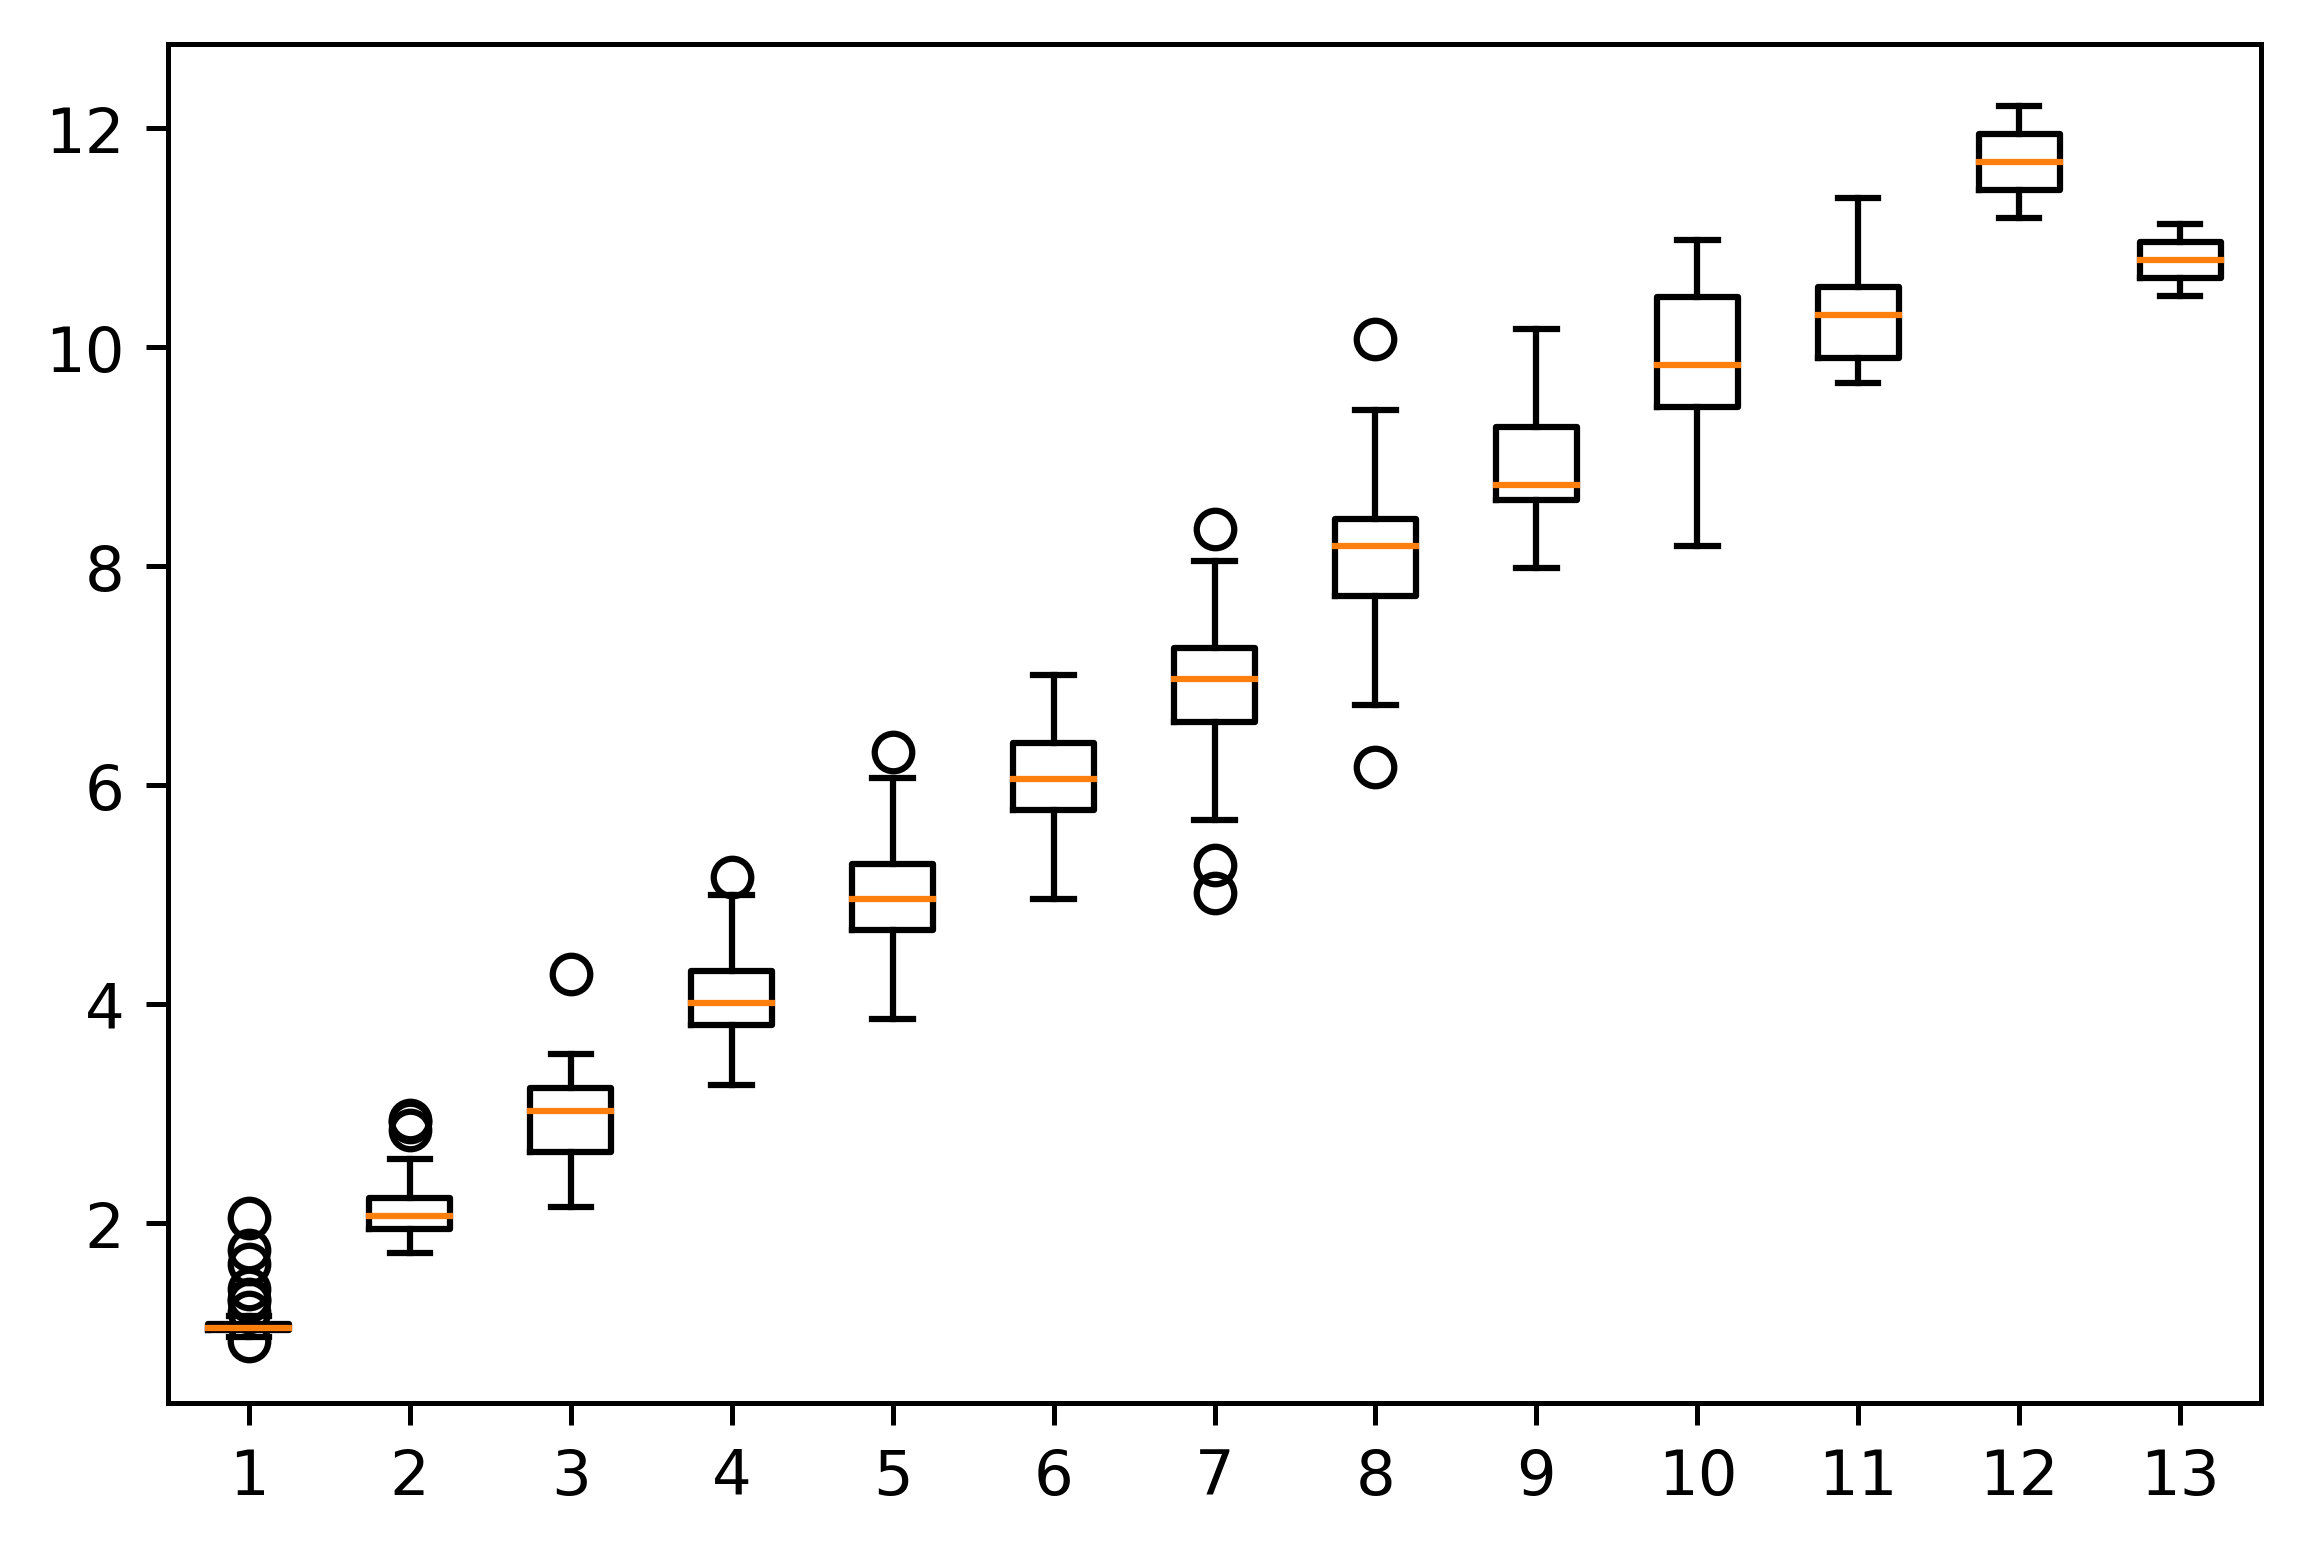

In [5]:
plt.rcParams['figure.dpi'] = 450
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] )

plt.boxplot(pr_age_group)
plt.show()


### Residual plot per age group

The predictions show heteroskedasticity:
heteroskedasticity happens when the standard deviations of a predicted variable, monitored over different values of an independent variable or as related to prior time periods, are non-constant.

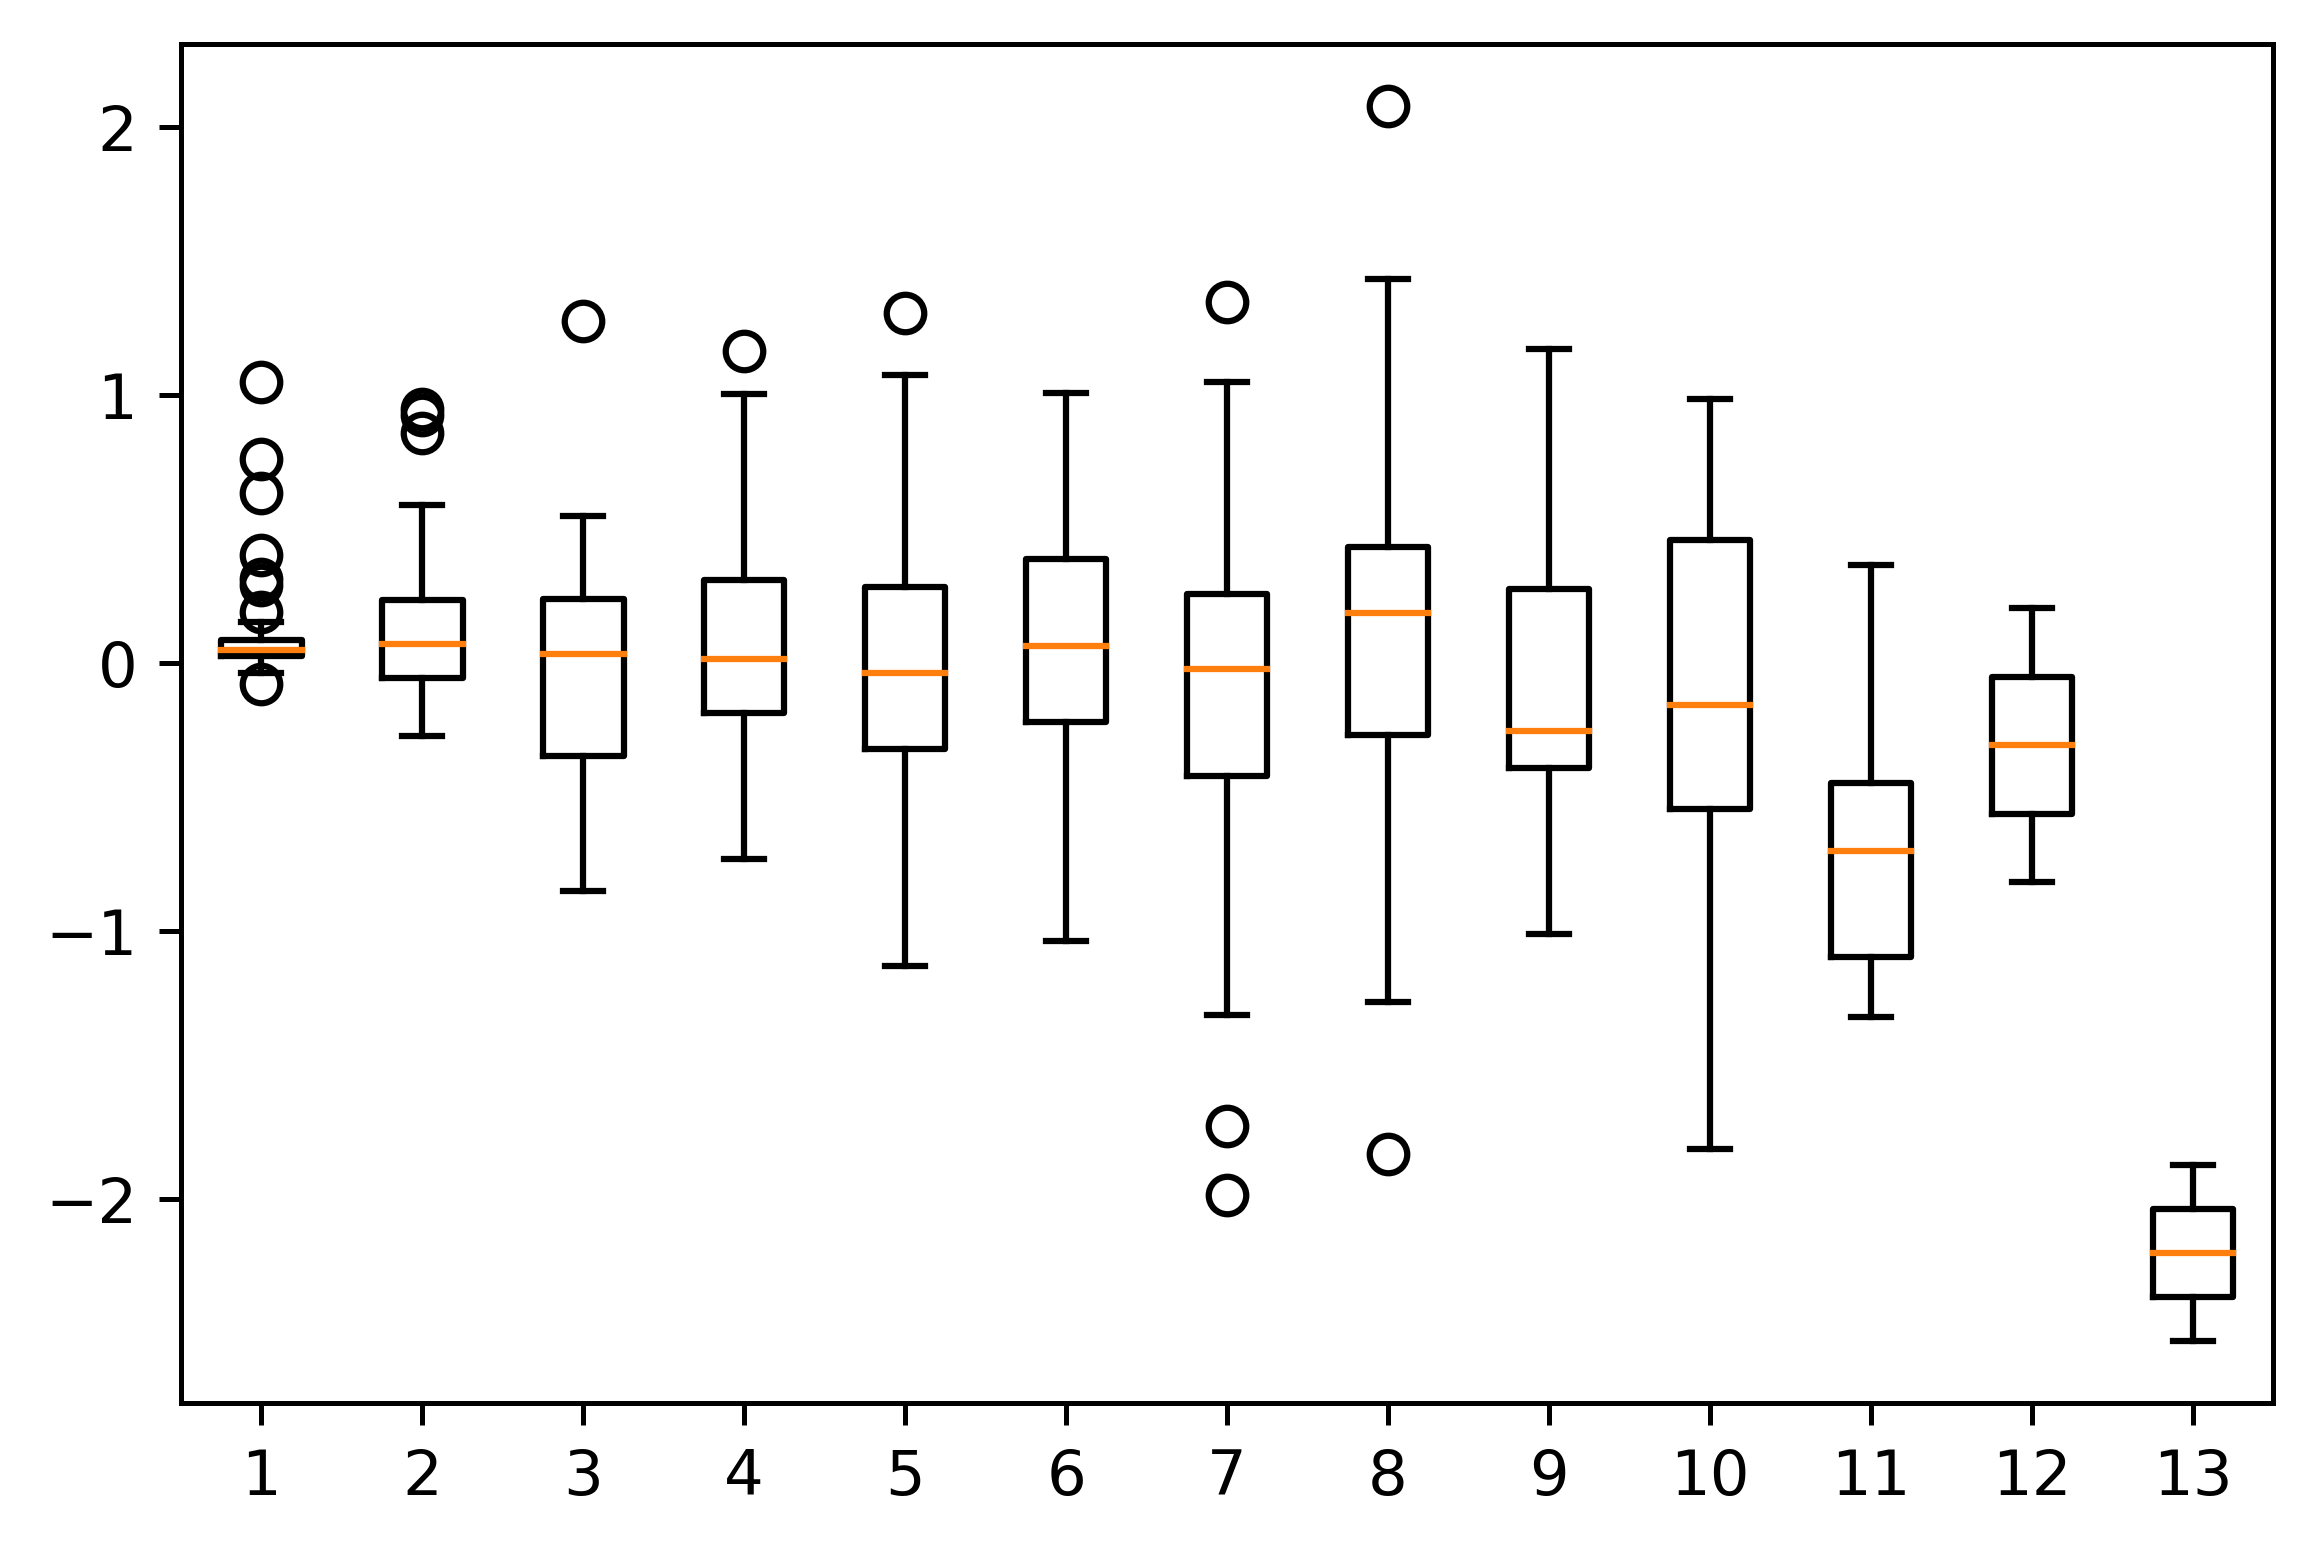

In [6]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(pr_age_group)
plt.show()

### Box plot of mode error summarized over all age groups, and summary statistics

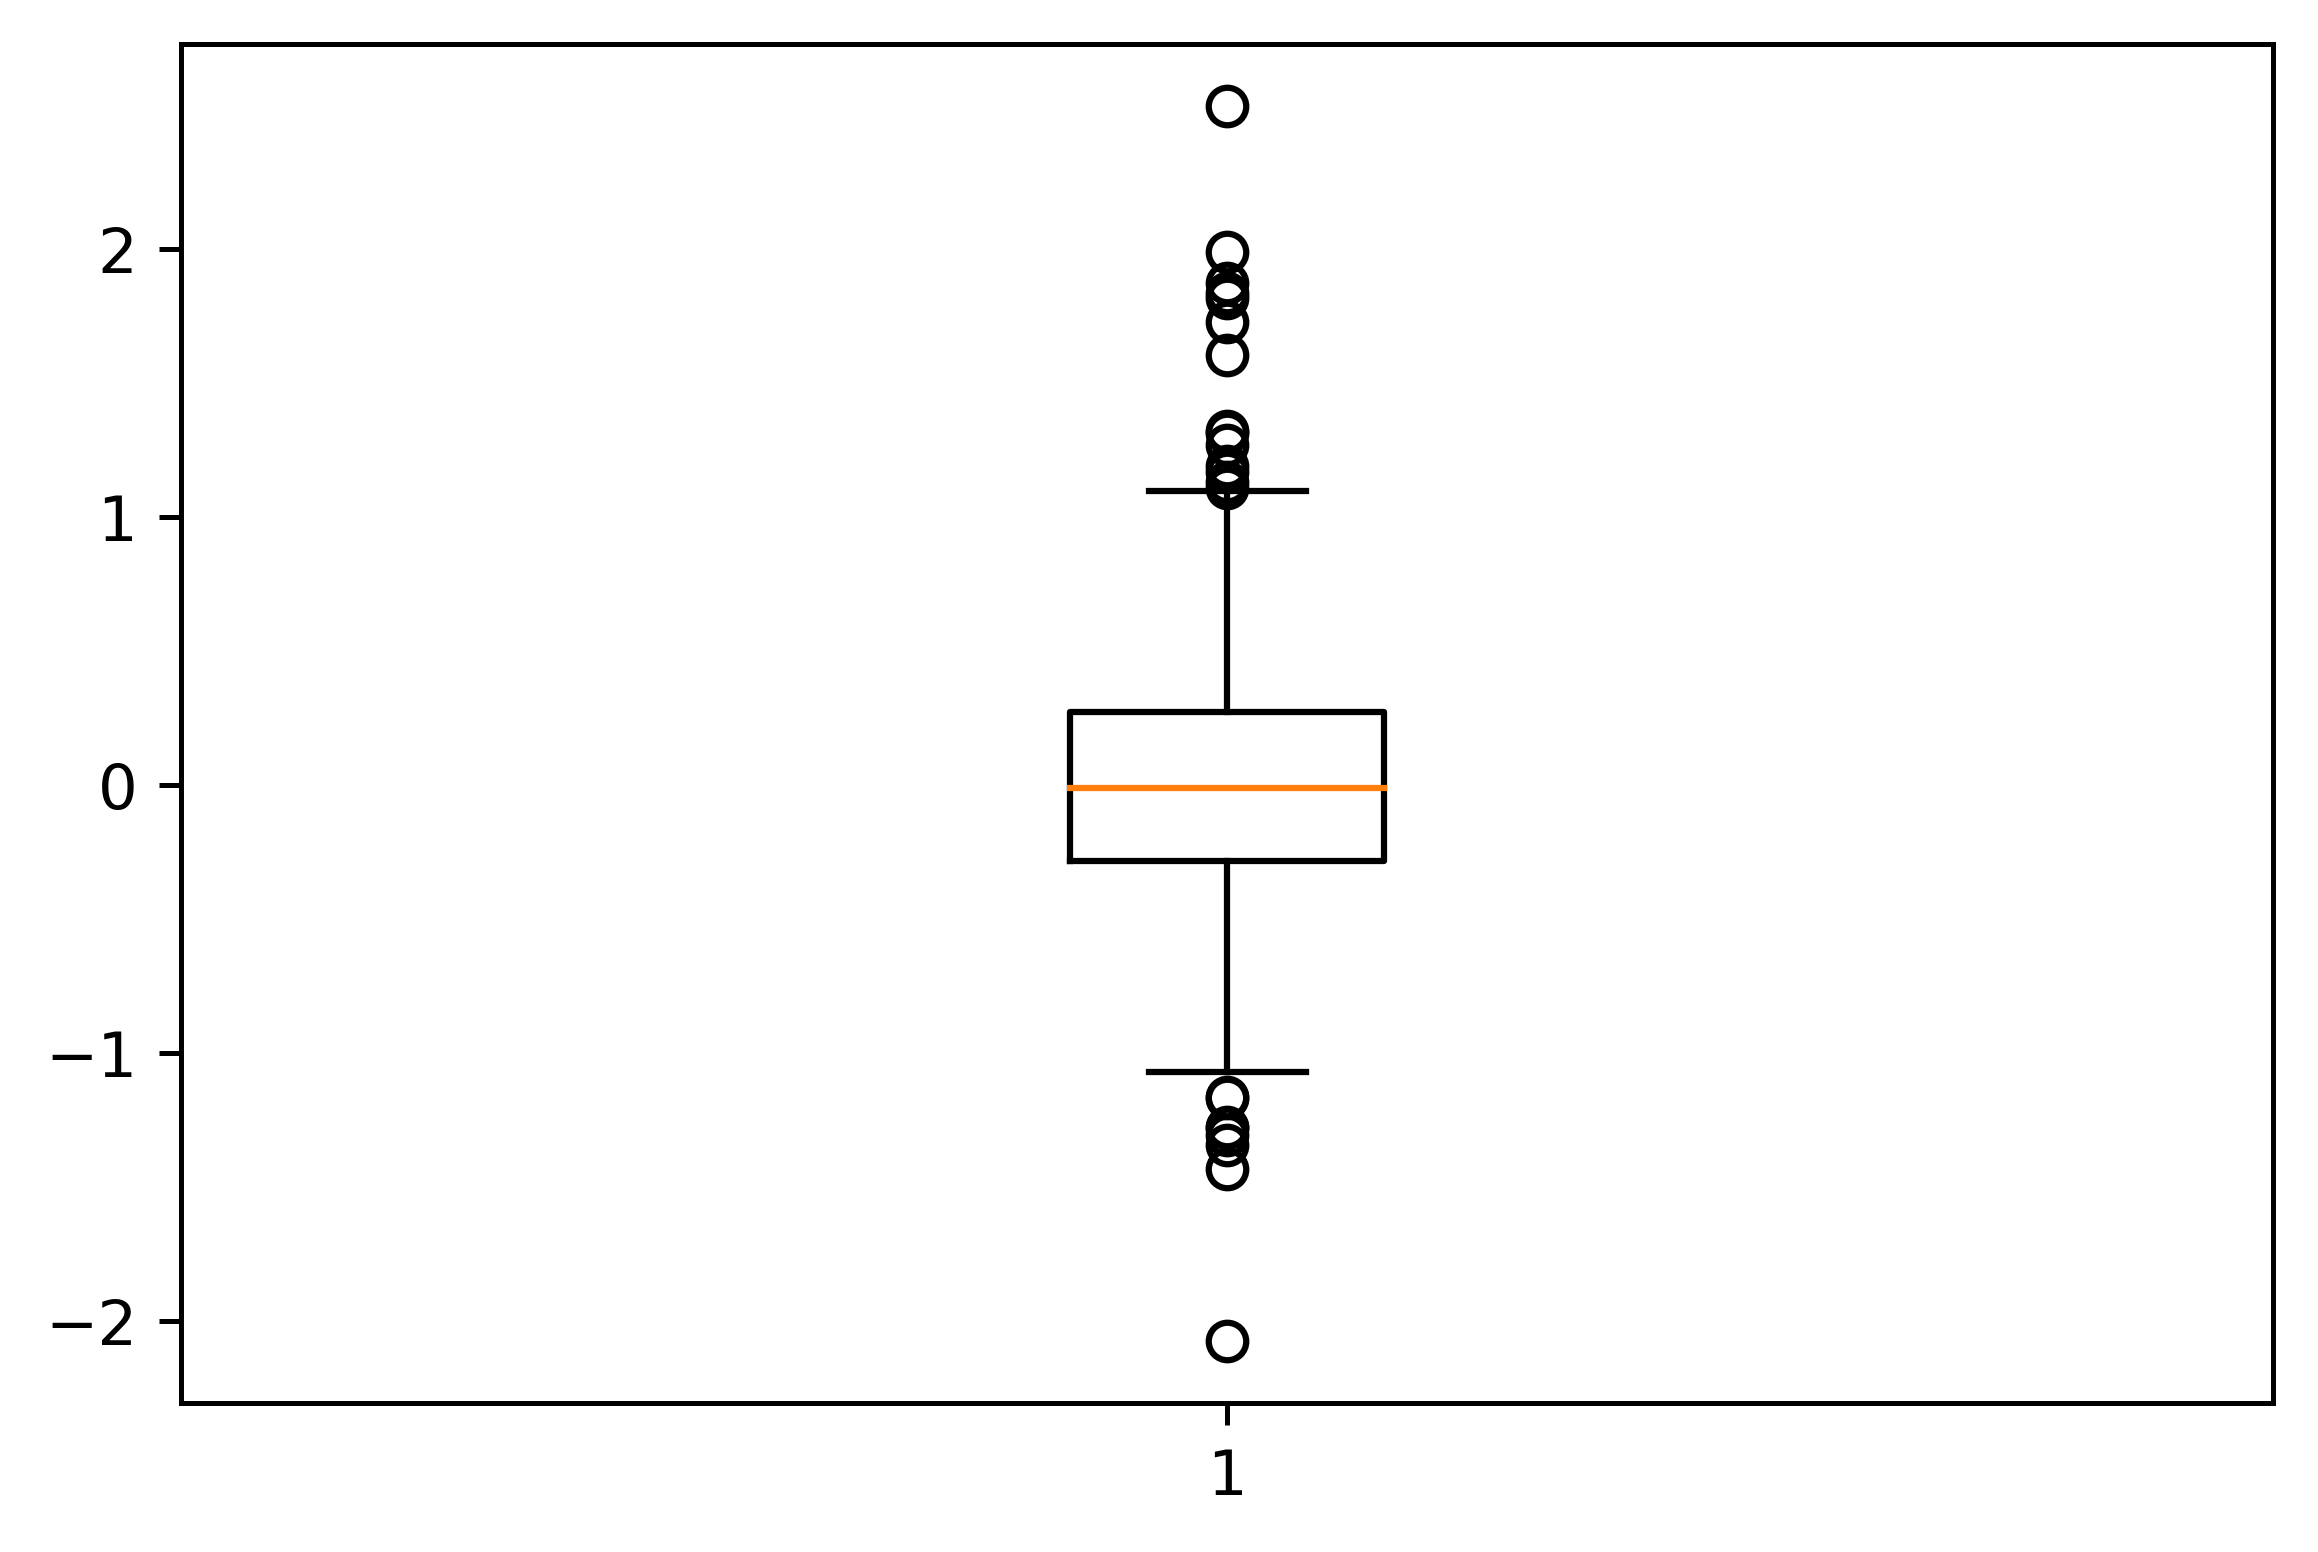

,0
count,515.000000
mean,0.005840
std,0.522778
min,-2.076995
25%,-0.285451
50%,-0.012444
75%,0.270330
max,2.531958


In [7]:
x = y_true.age.values
y = aggregate_pred.values
errors = x-y
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(errors)
plt.show()


df_describe = pd.DataFrame(errors)
df_describe.describe()

### Scatterplot error predictions after rounding

errors in [0.5, 1.5):  126
errors in [1.5, \inf): 8
Total missclassification errors:134


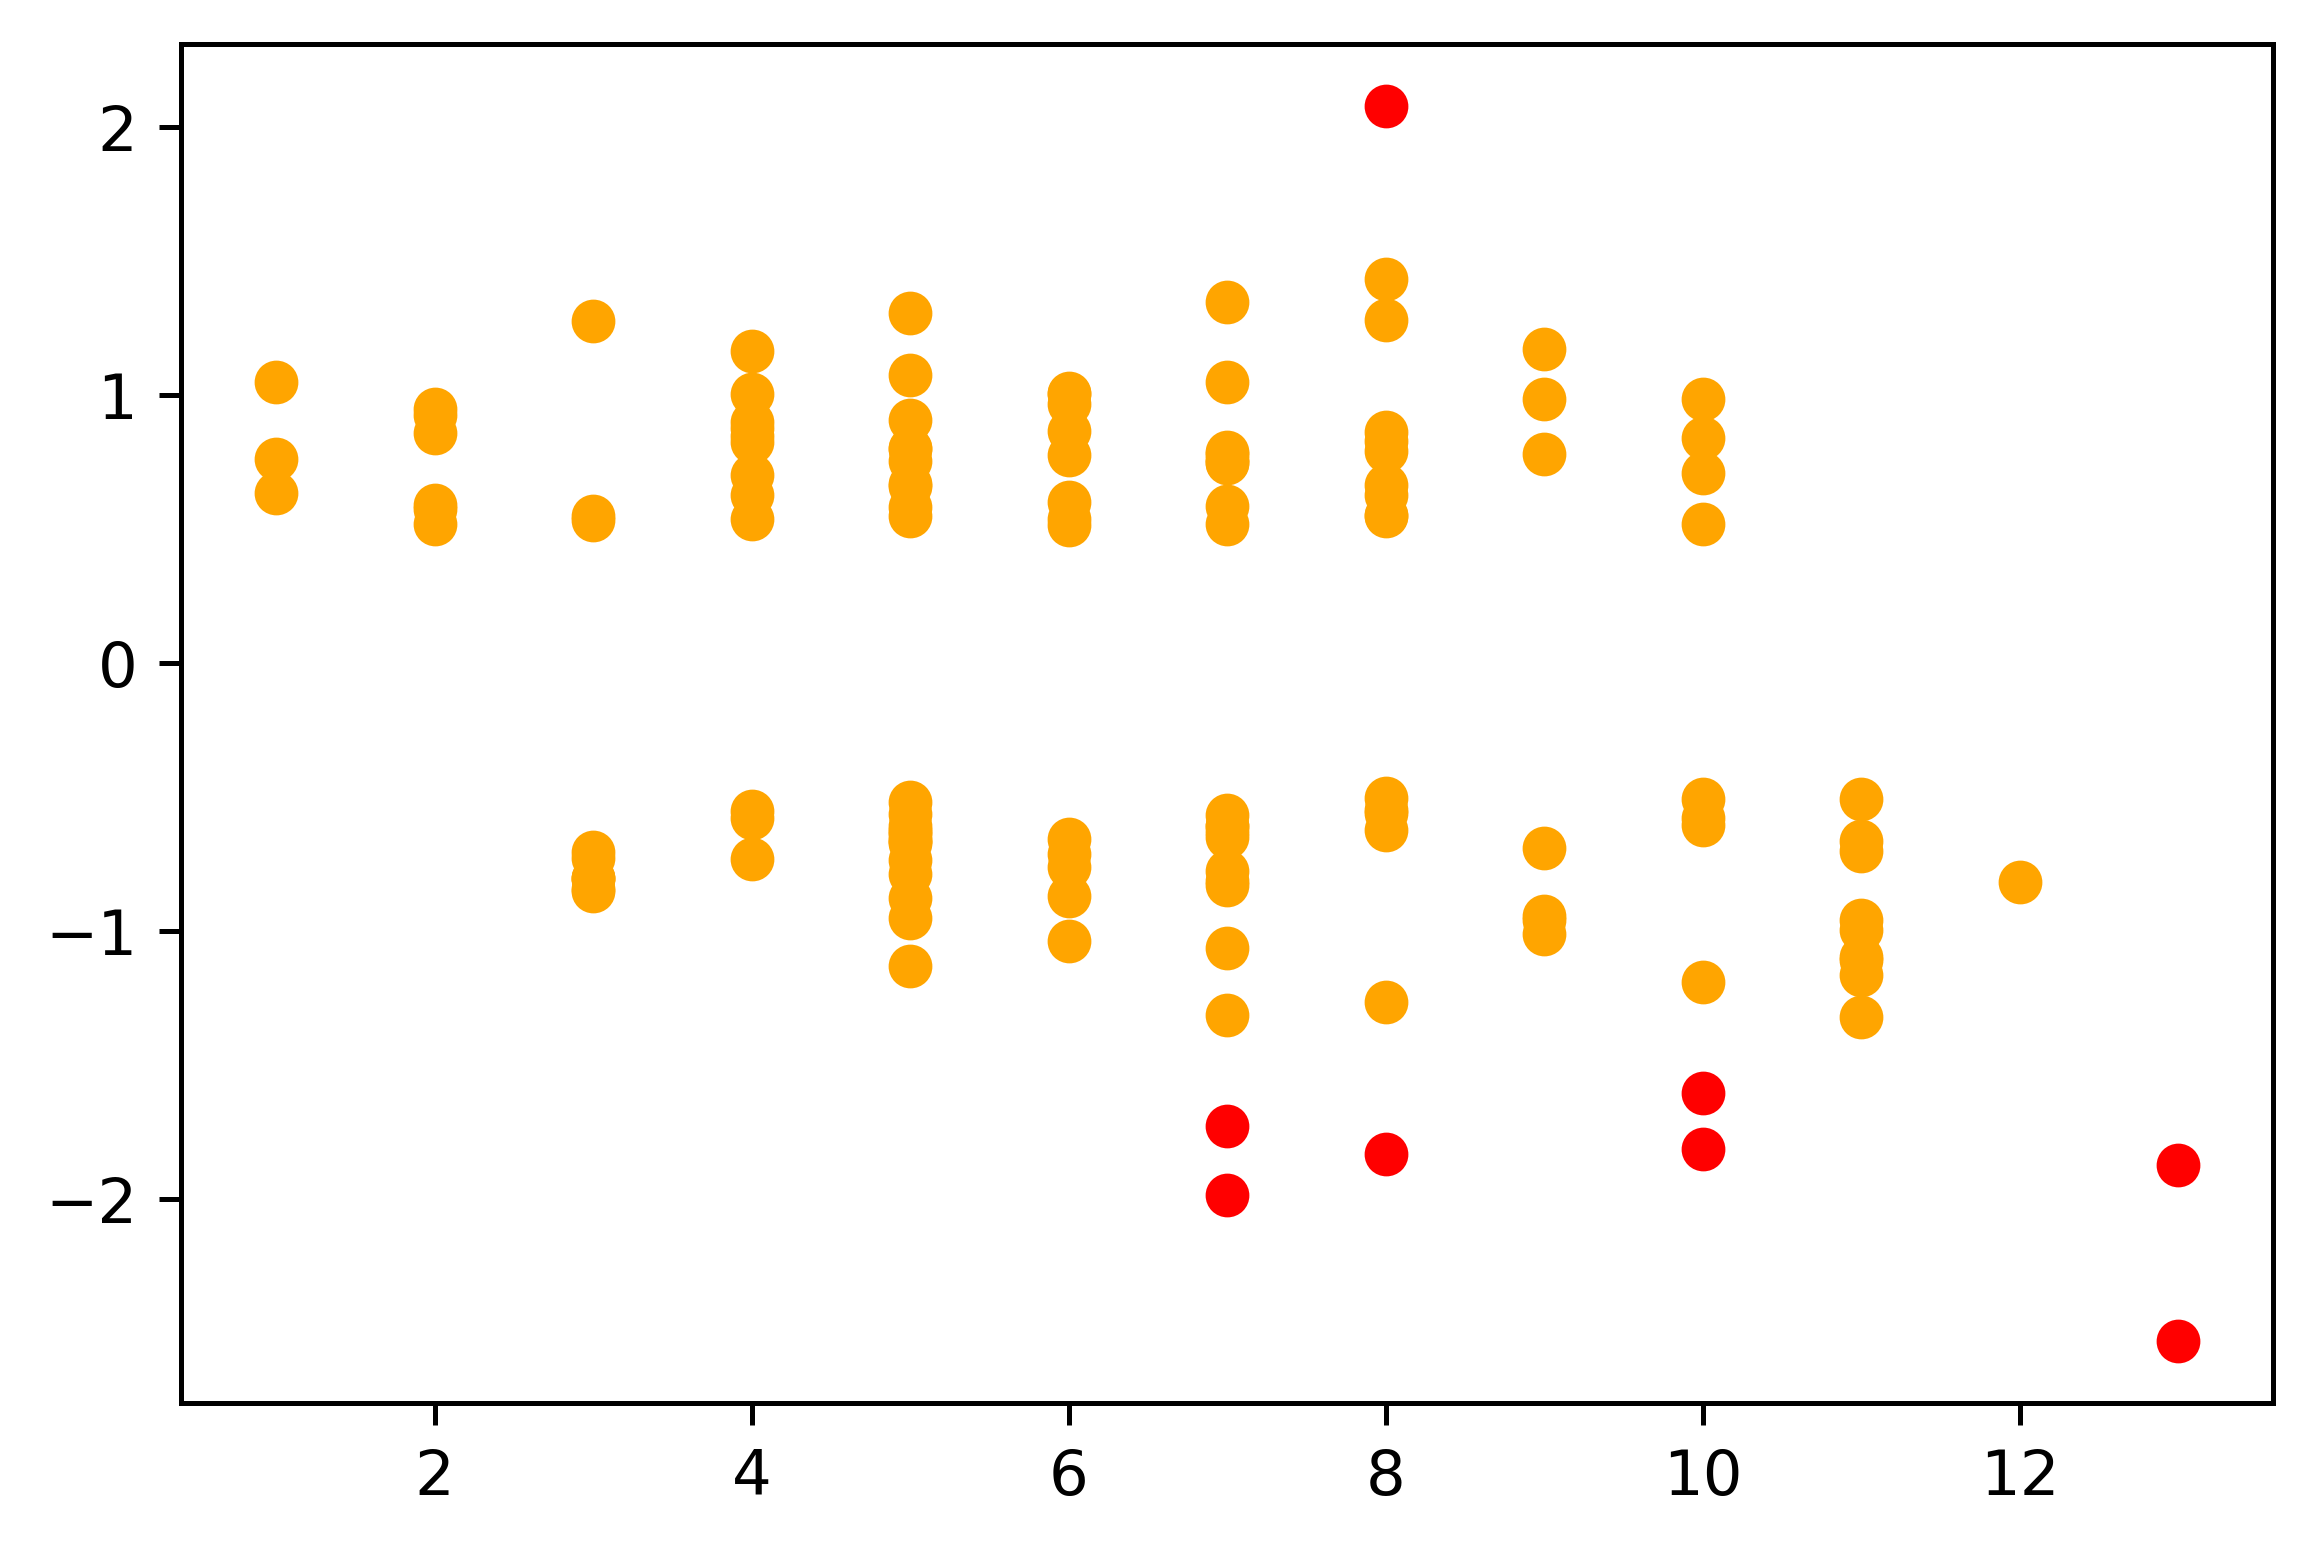

In [8]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
all_rounding_err1 = []
all_rounding_err2 = []
for i in age_range:
    age_idx = np.where(x == i)
    errors = y[age_idx] - i
    errors1 = errors[(np.abs(errors) >= 0.5) & (np.abs(errors) < 1.5)]
    x_axis = [i]*len(errors1)
    plt.scatter(x_axis, errors1, color="orange")
    
    errors2 = errors[np.abs(errors) >= 1.5 ]
    x_axis = [i]*len(errors2)
    plt.scatter(x_axis, errors2, color="red")
    all_rounding_err1.append(errors1)
    all_rounding_err2.append(errors2)
    

flat_list = [item for sublist in all_rounding_err1 for item in sublist]   
oneError = len(flat_list)
print("errors in [0.5, 1.5):  "+ str( oneError ) )

flat_list = [item for sublist in all_rounding_err2 for item in sublist]    
twoOrMore = len(flat_list)
print("errors in [1.5, \inf): "+ str( twoOrMore ) )
print("Total missclassification errors:"+str(oneError+twoOrMore))

plt.show()


### Excluding min/max prediction by fold pr prediction

In [9]:
all_preds = pd.DataFrame()
for i in range(1,10):
  all_preds[str(i)] = fold_preds[str(i)]

all_preds.head()
all_preds['new_pred'] =0.0
for index, row in all_preds.iterrows():
    mask = np.logical_or(row == row.max(), row == row.min())
    #print(mask)
    #print(row)
    row_masked = np.ma.masked_array(row, mask = mask)
    #print(row_masked)
    all_preds['new_pred'].iloc[index] = row_masked.mean()
    
all_preds.head()

print("aggregate accuracy, mse")
print(str( accuracy_score(all_preds.new_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(all_preds.new_pred, y_true.age) ))
#0.7398058252427184 0.2728000533332227

aggregate accuracy, mse
0.7398058252427184 0.27447196031417115


### Outliers >= 1.5 years

In [10]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
for i in age_range:
    age_idx = np.where(x == i)
    for j in age_idx[0]:
        if np.abs( y[ j ] - i ) >= 1.5:
            print(str(y[j])+" "+str(i), end=',')
            print(j)
            #print(y_true.iloc[j].path)

5.013828611373901 7,71
5.273415899276733 7,362
10.076995182037354 8,279
6.166722011566162 8,423
8.185531854629517 10,369
8.395232105255127 10,481
11.128140830993653 13,92
10.468041706085206 13,342
